# Importing necessary libraries

In [1]:
import tensorflow as tf

from keras import optimizers
from keras.utils import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import layers
from keras.applications import ResNet50, DenseNet201
from keras.applications import resnet, densenet

import numpy as np
import matplotlib.pyplot as plt

import cv2
import os
import pandas as pd

In [2]:
train_path = "/content/drive/MyDrive/Lung nodule detection/Data/train"
valid_path = "/content/drive/MyDrive/Lung nodule detection/Data/valid"
test_path = "/content/drive/MyDrive/Lung nodule detection/Data/test"

In [3]:
image_shape = (305,430,3)
N_CLASSES = 4
BATCH_SIZE = 32


train_datagen = ImageDataGenerator(dtype='float32', rescale= 1./255.)
train_generator = train_datagen.flow_from_directory(train_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (305,430),
                                                   class_mode = 'categorical')

valid_datagen = ImageDataGenerator(dtype='float32', rescale= 1./255.)
valid_generator = valid_datagen.flow_from_directory(valid_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (305,430),
                                                   class_mode = 'categorical')

test_datagen = ImageDataGenerator(dtype='float32', rescale = 1.0/255.0)
test_generator = test_datagen.flow_from_directory(test_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (305,430),
                                                   class_mode = 'categorical')

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


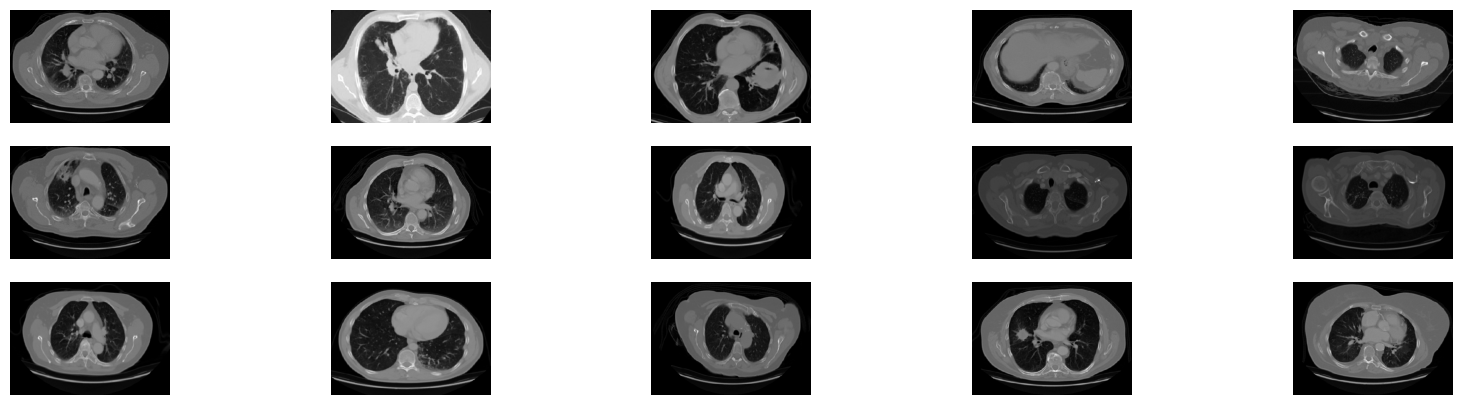

In [5]:
class_names=list(test_generator.class_indices.keys())
#print(class_names)

fig = plt.figure(figsize=(20,5))

image_batch,label_batch = test_generator[1]
for i in range(15):
    ax = fig.add_subplot(3,5,i+1,xticks = [], yticks = [])
    ax.imshow(image_batch[i])
    plt.axis('off')
    #plt.title(class_names[np.argmax(label_batch[i])])


In [ ]:
first_model = Sequential([
  Conv2D(8, 2, padding='same', activation='relu', input_shape = image_shape),
  MaxPooling2D(2),
  Conv2D(16, 2, padding='same', activation='relu'),
  MaxPooling2D(2),

  Dropout(0.4),
  Flatten(),
  Dense(256, activation='relu'),
  Dropout(0.4),
  Dense(4, activation='softmax')
])
first_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 305, 430, 8)       104       
                                                                 
 max_pooling2d (MaxPooling2  (None, 152, 215, 8)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 152, 215, 16)      528       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 76, 107, 16)       0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 76, 107, 16)       0         
                                                                 
 flatten (Flatten)           (None, 130112)            0

In [ ]:
checkpointer = ModelCheckpoint('chestmodel.hdf5',verbose=1, save_best_only= True)
early_stopping = EarlyStopping(monitor= 'val_loss', patience= 10)
optimizer = optimizers.Adam(learning_rate= 0.00001)

first_model.compile(loss= 'categorical_crossentropy', optimizer= optimizer, metrics=['acc'])
history = first_model.fit(train_generator,
                    steps_per_epoch = 20,
                    epochs = 80,
                    verbose = 1,
                    validation_data = valid_generator,
                    callbacks = [checkpointer, early_stopping])

Epoch 1/80
20/20 [==============================] - ETA: 0s - loss: 1.3106 - acc: 0.3475
Epoch 1: val_loss improved from inf to 1.39379, saving model to chestmodel.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


20/20 [==============================] - 188s 9s/step - loss: 1.3106 - acc: 0.3475 - val_loss: 1.3938 - val_acc: 0.3750
Epoch 2/80
20/20 [==============================] - ETA: 0s - loss: 1.1898 - acc: 0.4633
Epoch 2: val_loss improved from 1.39379 to 1.27826, saving model to chestmodel.hdf5
20/20 [==============================] - 8s 424ms/step - loss: 1.1898 - acc: 0.4633 - val_loss: 1.2783 - val_acc: 0.3889
Epoch 3/80
20/20 [==============================] - ETA: 0s - loss: 1.1146 - acc: 0.5008
Epoch 3: val_loss improved from 1.27826 to 1.27670, saving model to chestmodel.hdf5
20/20 [==============================] - 8s 377ms/step - loss: 1.1146 - acc: 0.5008 - val_loss: 1.2767 - val_acc: 0.4861
Epoch 4/80
20/20 [==============================] - ETA: 0s - loss: 1.0701 - acc: 0.5318
Epoch 4: val_loss improved from 1.27670 to 1.18639, saving model to chestmodel.hdf5
20/20 [==============================] - 9s 449ms/step - loss: 1.0701 - acc: 0.5318 - val_loss: 1.1864 - val_acc: 0.472

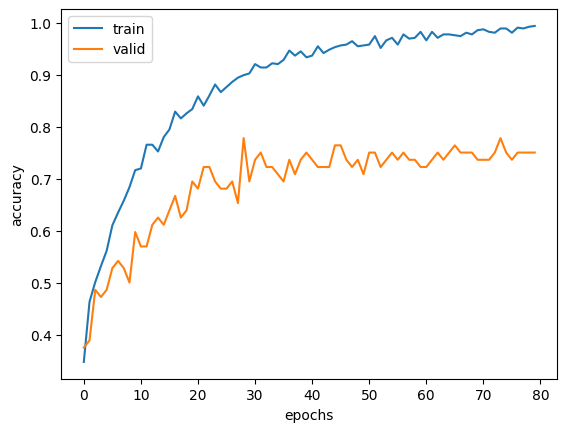

In [ ]:
plt.plot(history.history['acc'], label = 'train',)
plt.plot(history.history['val_acc'], label = 'valid')

plt.legend(loc = 'upper left')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

#DenseNet201

In [ ]:
image_shape = (460,460,3)
N_CLASSES = 4
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(dtype='float32', preprocessing_function=densenet.preprocess_input)
train_generator = train_datagen.flow_from_directory(train_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

valid_datagen = ImageDataGenerator(dtype='float32', preprocessing_function=densenet.preprocess_input)
valid_generator = valid_datagen.flow_from_directory(valid_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

test_datagen = ImageDataGenerator(dtype='float32', preprocessing_function=densenet.preprocess_input)
test_generator = test_datagen.flow_from_directory(test_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


In [ ]:
dense_model = DenseNet201(include_top=False, pooling='avg', weights='imagenet', input_shape = (image_shape))

# make all layers except conv5 layers not trainable
for layer in dense_model.layers:
    if 'conv5' not in layer.name:
        layer.trainable = False

74836368/74836368 [==============================] - 3s 0us/step


In [ ]:
densenet_model = Sequential()
densenet_model.add(dense_model)
densenet_model.add(Flatten())
densenet_model.add(BatchNormalization())
densenet_model.add(Dense(N_CLASSES, activation='softmax'))
densenet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 1920)              18321984  
                                                                 
 flatten_1 (Flatten)         (None, 1920)              0         
                                                                 
 batch_normalization (BatchN  (None, 1920)             7680      
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 4)                 7684      
                                                                 
Total params: 18,337,348
Trainable params: 6,990,084
Non-trainable params: 11,347,264
_________________________________________________________________


In [ ]:
optimizer = optimizers.Adam(learning_rate= 0.00001, decay= 1e-6)
densenet_model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics = ['acc'])

checkpointer = ModelCheckpoint(filepath='./chestmodel-DenseNet201.hdf5',
                            monitor='val_loss', verbose = 1,
                            save_best_only=True)
early_stopping = EarlyStopping(verbose=1, patience=15)

In [ ]:
history_dense = densenet_model.fit(train_generator,
                                steps_per_epoch = 20,
                                epochs = 50,
                                verbose = 1,
                                validation_data = valid_generator,
                                callbacks = [checkpointer, early_stopping])

Epoch 1/50
20/20 [==============================] - ETA: 0s - loss: 1.1491 - acc: 0.5008
Epoch 1: val_loss improved from inf to 1.45784, saving model to ./chestmodel-DenseNet201.hdf5
20/20 [==============================] - 57s 2s/step - loss: 1.1491 - acc: 0.5008 - val_loss: 1.4578 - val_acc: 0.2361
Epoch 2/50
20/20 [==============================] - ETA: 0s - loss: 0.7104 - acc: 0.7259
Epoch 2: val_loss improved from 1.45784 to 1.34867, saving model to ./chestmodel-DenseNet201.hdf5
20/20 [==============================] - 17s 815ms/step - loss: 0.7104 - acc: 0.7259 - val_loss: 1.3487 - val_acc: 0.2639
Epoch 3/50
20/20 [==============================] - ETA: 0s - loss: 0.5015 - acc: 0.8597
Epoch 3: val_loss improved from 1.34867 to 1.25205, saving model to ./chestmodel-DenseNet201.hdf5
20/20 [==============================] - 17s 833ms/step - loss: 0.5015 - acc: 0.8597 - val_loss: 1.2521 - val_acc: 0.3333
Epoch 4/50
20/20 [==============================] - ETA: 0s - loss: 0.3753 - acc

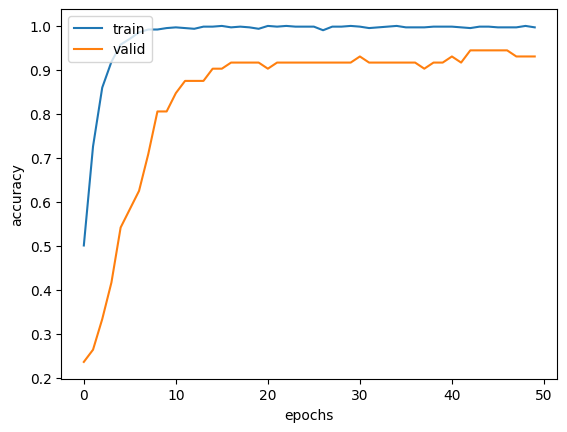

In [ ]:
plt.plot(history_dense.history['acc'], label = 'train',)
plt.plot(history_dense.history['val_acc'], label = 'valid')

plt.legend(loc = 'upper left')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [ ]:
dns_result = densenet_model.evaluate(test_generator)

10/10 [==============================] - 80s 9s/step - loss: 0.5917 - acc: 0.7841


# ResNet50

In [ ]:
image_shape = (460,460,3)
N_CLASSES = 4
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(dtype='float32')
train_generator = train_datagen.flow_from_directory(train_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

valid_datagen = ImageDataGenerator(dtype='float32')
valid_generator = valid_datagen.flow_from_directory(valid_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

test_datagen = ImageDataGenerator(dtype='float32')
test_generator = test_datagen.flow_from_directory(test_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


In [ ]:
res_model = ResNet50(include_top=False, pooling='avg', weights='imagenet', input_shape = (image_shape))

# make all layers except conv5 layers not trainable
for layer in res_model.layers:
    if 'conv5' not in layer.name:
        layer.trainable = False

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet_model = Sequential()
resnet_model.add(res_model)
resnet_model.add(Dropout(0.4))
resnet_model.add(Flatten())
resnet_model.add(BatchNormalization())
resnet_model.add(Dropout(0.4))
resnet_model.add(Dense(N_CLASSES, activation='softmax'))
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 batch_normalization (Batch  (None, 2048)              8192      
 Normalization)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                        

In [ ]:
optimizer = optimizers.Adam(learning_rate= 0.00001)
resnet_model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics = ['acc'])

In [ ]:
checkpointer = ModelCheckpoint(filepath='./finalmodel-ResNet50.hdf5',
                            monitor='val_loss', verbose = 1,
                            save_best_only=True)
early_stopping = EarlyStopping(verbose=1, patience=20)

In [ ]:
history_res = resnet_model.fit(train_generator,
                            steps_per_epoch = 20,
                            epochs = 80,
                            verbose = 1,
                            validation_data = valid_generator,
                            callbacks = [checkpointer, early_stopping])

Epoch 1/80
20/20 [==============================] - ETA: 0s - loss: 2.0230 - acc: 0.3181
Epoch 1: val_loss improved from inf to 1.49829, saving model to ./finalmodel-ResNet50.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


20/20 [==============================] - 146s 6s/step - loss: 2.0230 - acc: 0.3181 - val_loss: 1.4983 - val_acc: 0.1944
Epoch 2/80
20/20 [==============================] - ETA: 0s - loss: 1.2766 - acc: 0.4927
Epoch 2: val_loss improved from 1.49829 to 1.24281, saving model to ./finalmodel-ResNet50.hdf5
20/20 [==============================] - 14s 666ms/step - loss: 1.2766 - acc: 0.4927 - val_loss: 1.2428 - val_acc: 0.2361
Epoch 3/80
20/20 [==============================] - ETA: 0s - loss: 1.1227 - acc: 0.5530
Epoch 3: val_loss improved from 1.24281 to 1.09380, saving model to ./finalmodel-ResNet50.hdf5
20/20 [==============================] - 14s 682ms/step - loss: 1.1227 - acc: 0.5530 - val_loss: 1.0938 - val_acc: 0.4861
Epoch 4/80
20/20 [==============================] - ETA: 0s - loss: 0.9830 - acc: 0.6215
Epoch 4: val_loss improved from 1.09380 to 0.99565, saving model to ./finalmodel-ResNet50.hdf5
20/20 [==============================] - 14s 674ms/step - loss: 0.9830 - acc: 0.6215

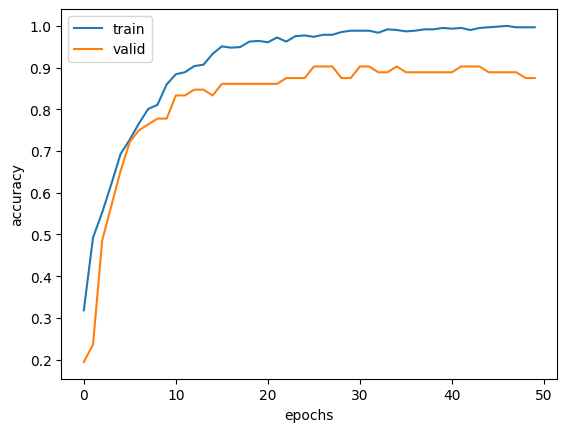

In [ ]:
plt.plot(history_res.history['acc'], label = 'train',)
plt.plot(history_res.history['val_acc'], label = 'valid')

plt.legend(loc = 'upper left')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [ ]:
result = resnet_model.evaluate(test_generator)

#  Making predictions with best model (ResNet50)

In [ ]:
from keras.models import load_model
resnet50_model = load_model('finalmodel-ResNet50.hdf5')

#### Confusion Matrix

In [ ]:
import os

paths = ["/content/drive/MyDrive/Lung nodule detection/Data/test/adenocarcinoma",
         "/content/drive/MyDrive/Lung nodule detection/Data/test/large.cell.carcinoma/",
         "/content/drive/MyDrive/Lung nodule detection/Data/test/normal/",
         "/content/drive/MyDrive/Lung nodule detection/Data/test/squamous.cell.carcinoma/"]

results = {"adeno": {0: 0, 1: 0, 2: 0, 3: 0},
           "large": {0: 0, 1: 0, 2: 0, 3: 0},
           "normal": {0: 0, 1: 0, 2: 0, 3: 0},
           "squamous": {0: 0, 1: 0, 2: 0, 3: 0}}

for path, key in zip(paths, results.keys()):
    for file in os.listdir(path):
        img_path = os.path.join(path, file)  # Create the full file path
        img = tf.keras.utils.load_img(
            img_path, target_size=(460, 460)
        )
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)
        prediction = resnet50_model.predict(img_array, verbose=0)
        results[key][np.argmax(prediction)] += 1

print(results)


{'adeno': {0: 103, 1: 13, 2: 0, 3: 4}, 'large': {0: 5, 1: 46, 2: 0, 3: 0}, 'normal': {0: 0, 1: 0, 2: 54, 3: 0}, 'squamous': {0: 5, 1: 1, 2: 0, 3: 84}}


In [ ]:
df = pd.DataFrame(results)

print("Overall accuracy is : {:.2f}%\n".format((df["adeno"][0] + df["large"][1] + df["normal"][2] + df["squamous"][3]) / 315 * 100))

print("Adeno cancer detection accuracy is : {:.2f}%".format(df["adeno"][0] / df["adeno"].sum() * 100))
print("Large cell cancer detection accuracy is : {:.2f}%".format(df["large"][1] / df["large"].sum() * 100))
print("Normal chest detection accuracy is : {:.2f}%".format(df["normal"][2] / df["normal"].sum() * 100))
print("Squamous cell cancer detection accuracy is : {:.2f}%".format(df["squamous"][3] / df["squamous"].sum() * 100))

print("\nConfusion Matrix :")
df.transpose()

Overall accuracy is : 91.11%

Adeno cancer detection accuracy is : 85.83%
Large cell cancer detection accuracy is : 90.20%
Normal chest detection accuracy is : 100.00%
Squamous cell cancer detection accuracy is : 93.33%

Confusion Matrix :


,0,1,2,3
adeno,103,13,0,4
large,5,46,0,0
normal,0,0,54,0
squamous,5,1,0,84


#### Predict for one picture

In [ ]:
img_path = "/content/drive/MyDrive/Lung nodule detection/Data/test/large.cell.carcinoma/000108.png"

class_names=list(test_generator.class_indices.keys())

img = tf.keras.utils.load_img(img_path, target_size=(460, 460))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

prediction = resnet50_model.predict(img_array)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(prediction)], 100 * np.max(prediction))
)


1/1 [==============================] - 0s 23ms/step
This image most likely belongs to large.cell.carcinoma with a 59.96 percent confidence.


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved ResNet model
resnet_model = load_model('path_to_your_saved_ResNet_model.h5')

# Assuming you have a sample image and preprocess it similarly as before
sample_image = load_your_image_function('path_to_your_image.jpg')
processed_image = preprocess_your_image_function(sample_image)

# Get the ResNet features for your image
resnet_features = resnet_model.predict(np.expand_dims(processed_image, axis=0))


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define your RNN model
rnn_model = Sequential()

# Assuming resnet_features.shape[1:] gives the shape of the features from ResNet
# You might need to adjust this input shape based on your ResNet output
rnn_model.add(LSTM(units=128, input_shape=resnet_features.shape[1:], return_sequences=True))
rnn_model.add(LSTM(units=64))

# Add Dense layers or any additional layers based on your architecture needs
rnn_model.add(Dense(32, activation='relu'))
rnn_model.add(Dense(N_CLASSES, activation='softmax'))  # Assuming N_CLASSES is defined

# Compile the RNN model
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Assuming you have your target data for RNN (y_rnn_train) prepared and loaded similarly to ImageDataGenerator
history_rnn = rnn_model.fit(resnet_features, y_rnn_train, epochs=10, batch_size=32, validation_split=0.2)
